In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv("iris.data", names=columns)

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Convert class labels to numerical values
class_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
data['class'] = data['class'].map(class_mapping)

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# Extract feature values
X = data.iloc[:, :4].values

In [7]:
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(X)

In [8]:
X_pca

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [9]:
# Perform K-Means clustering on PCA-transformed data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)

D:\Softwares\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
# Add cluster labels to the dataset
data['cluster'] = cluster_labels

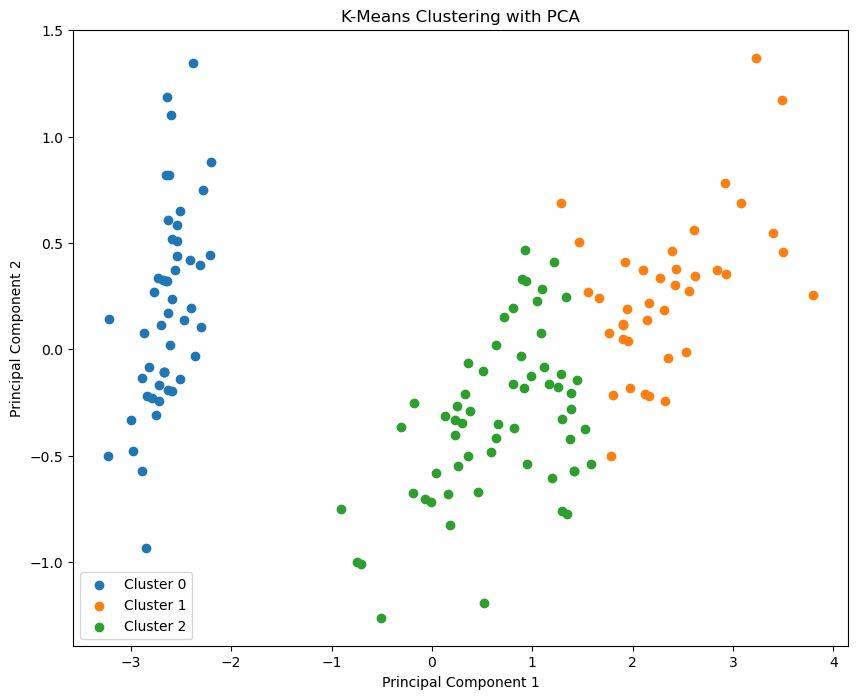

In [14]:
# Create scatter plots to visualize the clusters
plt.figure(figsize=(10, 8))

# Scatter plot using PCA-transformed data
for cluster_id in range(3):
    plt.scatter(X_pca[data['cluster'] == cluster_id, 0], X_pca[data['cluster'] == cluster_id, 1], label=f'Cluster {cluster_id}')

plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()